#### 本次使用的推荐模型

> *  **基于所有数据的热门电影推荐**- 根据电影的受欢迎程度和类型，向每个用户提供普适化的推荐。


> *  **基于电影信息的电影推荐**- 考虑到人们会喜欢相似的电影，我们可以根据电影的类型、导演、梗概、演员进行电影推荐

> *  **基于相似用户的电影推荐**- 这种模型会寻找和你兴趣相似的人并且给你推荐他/她喜欢的电影

首先加载TMDB数据

In [3]:
import pandas as pd 
import numpy as np 

df1=pd.read_csv('./tmdb_5000_credits.csv')
df2=pd.read_csv('./tmdb_5000_movies.csv')

两个数据集的内容有：

**tmdb_5000_credits**
* movie_id - 每部电影的唯一标识符
* cast - 主演和配角的名字
* crew - 导演、编辑、作曲家、编剧等的名字

**tmdb_5000_movies**

* budget - 电影制作的预算
* genre - 电影的体裁
* homepage - 电影网站主页
* id - **tmdb_5000_credits**中的movie_id
* keywords - 与电影有关的关键词或标签
* original_language - 电影所使用的语言
* original_title - 翻译或改编前的电影名称
* overview - 电影的简要描述
* popularity - 一个代表电影受欢迎程度的数值
* production_companies - The production house of the movie.
* production_countries - The country in which it was produced.
* release_date - 上映时间
* revenue - 电影在全世界产生的收入
* runtime - 电影时长
* status - "已上映" 或 "据传"
* tagline - 电影的标语
* title - 电影的标题
* vote_average -  电影获得的平均评分
* vote_count - 收到的投票数



In [4]:
df1.columns = ['id','tittle','cast','crew']
df2= df2.merge(df1,on='id')

首先检查一下数据的类型

In [5]:
df2.head(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,tittle,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


# **基于所有数据的热门电影推荐** 

首先，我们需要找到一个电影评分标准，利用已有的数据进行评分并进行排序，最终选出热门影片。需要注意的是最终的排名需要考虑到评分人数，因为评分人数更多，得到的评分相对更加稳定客观。网站IMDB使用的评分算法为：

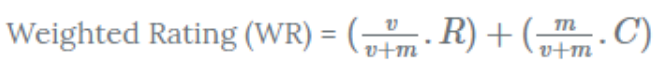

* v 是电影得到评分的数量；
* m 是获得评分的最小评分数量；
* R 是电影的平均评分；
* C 是整个电影数据的平均票数

v就是数据集中的**vote_count**，R就是数据集中的**vote_average**，接下来可以计算C。

In [8]:
C= df2['vote_average'].mean()
C

6.092171559442016

可以看到所有电影的平均评分在10分制中约为6分。接下来需要确定一个适当的m值。我们选用百分之九十作为我们的分界线。也就是说一部电影要想出现在排行榜上，它的票数至少要比排行榜上90%的电影多。

In [9]:
m= df2['vote_count'].quantile(0.9)
m

1838.4000000000015

接下来我们可以看到上榜的电影了

In [10]:
q_movies = df2.copy().loc[df2['vote_count'] >= m]
q_movies.shape

(481, 23)

可以看到有481部电影符合要求，接下来我们需要为这些电影计算评分。

In [11]:
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    return (v/(v+m) * R) + (m/(m+v) * C)

In [13]:
# 接下来把得到的分数返回到dataframe中
q_movies['score'] = q_movies.apply(weighted_rating, axis=1)

最后，根据分数对DataFrame进行排序，并输出前10部电影的标题、投票数、平均票数和加权评级或分数。

In [14]:
#按评分降序排列电影
q_movies = q_movies.sort_values('score', ascending=False)

#Print the top 15 movies
q_movies[['title', 'vote_count', 'vote_average', 'score']].head(20)

,title,vote_count,vote_average,score
1881,The Shawshank Redemption,8205,8.5,8.059258
662,Fight Club,9413,8.3,7.939256
65,The Dark Knight,12002,8.2,7.920020
3232,Pulp Fiction,8428,8.3,7.904645
96,Inception,13752,8.1,7.863239
3337,The Godfather,5893,8.4,7.851236
95,Interstellar,10867,8.1,7.809479
809,Forrest Gump,7927,8.2,7.803188
329,The Lord of the Rings: The Return of the King,8064,8.1,7.727243
1990,The Empire Strikes Back,5879,8.2,7.697884


Text(0.5, 1.0, 'Recommended Movies')

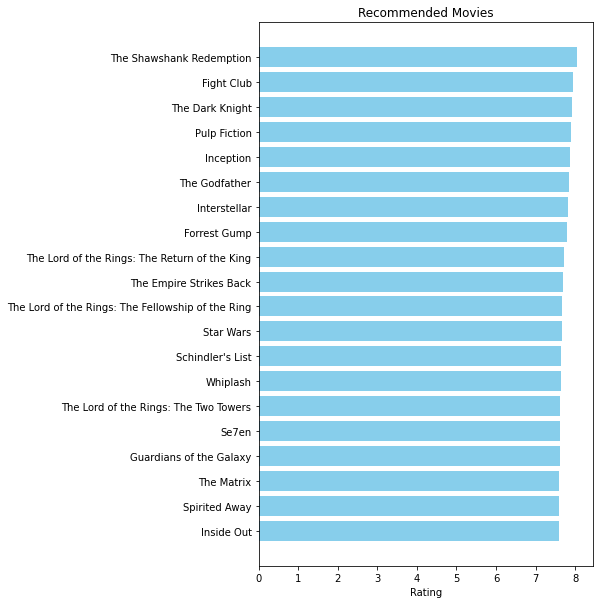

In [38]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,10))

plt.barh(q_movies['title'].head(20),q_movies['score'].head(20), align='center',
        color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Rating")
plt.title("Recommended Movies")

Text(0.5, 1.0, 'Popular Movies')

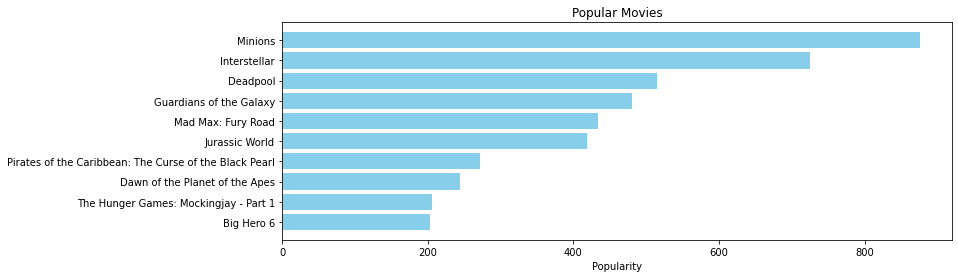

In [39]:
pop= df2.sort_values('popularity', ascending=False)
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.barh(pop['title'].head(10),pop['popularity'].head(10), align='center',
        color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies")


可以看到这样的模型可以筛选出热门的电影，但是没有考虑到用户的个性化需求，接下来我们可以使用基于电影信息的推荐模型来改善这一点。

# **基于电影信息的推荐模型**
本模型中我们可以使用电影的信息（演员，关键词，标语，工作人员，概述等等）来获取相似的电影并且进行推荐。


## **基于剧情相似性的电影推荐**

这里我们使用数据集里的**overview**属性中的文本计算电影情节之间的相似性。

In [15]:
df2['overview'].head(5)

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
Name: overview, dtype: object

首先，我们要转换概述中的词向量，在这里我们使用TF-IDF(Term Frequency-Inverse Document Frequency)来计算概述中的词向量。

词频（term frequency）是指一个词出现在文本中的相对频率，计算方法为：
   **(特定词出现次数/全部词数)**.
Inverse Document Frequency is the relative count of documents containing the term is given as 
**log(number of documents/documents with term)**
The overall importance of each word to the documents in which they appear is equal to **TF * IDF**

经过计算后我们会得到一个矩阵，其中每一列代表概述词汇中的一个词（所有至少出现在一个文件中的词），每一行代表一部电影，如前所述。这样做是为了减少在情节概述中经常出现的词的重要性，因此，在计算最终的相似性分数时，它们的重要性也会降低。

我们可以使用scikit-learn中内置的TfIdfVectorizer类来获得TF-IDF矩阵。

In [16]:
#Import TfIdfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
df2['overview'] = df2['overview'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(df2['overview'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(4803, 20978)

我们的4800部电影的数据集中有超过两万个不同的词，利用上述的矩阵，我们现在可以计算出一个相似度分数。在这里我们使用余弦相似度表示两部电影的相似度分数，余弦相似度的数学定义如下：
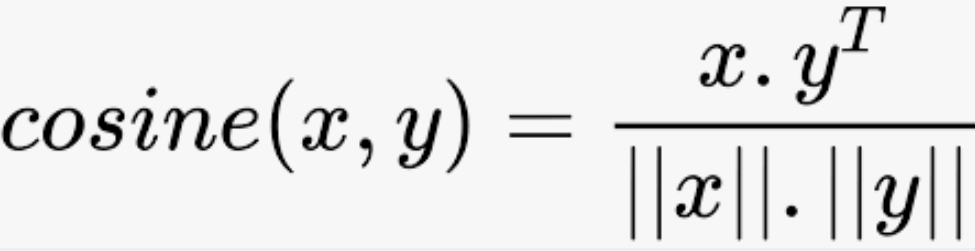


我们使用了TF-IDF向量器，计算点积将直接给我们余弦相似度分数。因此，我们将使用sklearn的**linear_kernel()**而不是cosine_similarities()，因为它更快。

In [17]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

接下来我们要通过输入的电影标题来输出与之相似的电影列表。这首先需要我们能够从给定标题获取对应dataframe的元数据。

In [18]:
#Construct a reverse map of indices and movie titles
indices = pd.Series(df2.index, index=df2['title']).drop_duplicates()


接下来我们遵循以下步骤进行映射
* 获取电影标题的索引值。
* 获取该特定电影与所有电影的余弦相似度分数列表。将其转换为一个图元列表，其中第一个元素是其位置，第二个元素是相似度分数。
* 根据相似度分数对上述图元列表进行排序；也就是说，第二个元素。
* 获得这个列表中的前10个元素。忽略第一个元素，因为它指的是自己（与某部电影最相似的电影就是这部电影本身）。
* 返回与顶级元素的索引相对应的标题。

In [25]:
#输入电影名称，获取相似电影
def get_recommendations(title, cosine_sim=cosine_sim):
    #计算并选出余弦相似度最高的十部电影
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    
    #根据获得的索引输出最相似电影
    movie_indices = [i[0] for i in sim_scores]
    return df2['title'].iloc[movie_indices]


In [26]:
get_recommendations('Moon')

3604                       Apollo 18
1281                         Hackers
2027                        I Am Sam
4207                 Out of the Dark
530                          Killers
1283             The Hudsucker Proxy
2017                           Ghost
311     The Adventures of Pluto Nash
1796                        Brothers
553                      The Kingdom
Name: title, dtype: object

目前我们的系统已经可以推荐有类似情节的电影，但问题在于推荐的电影因为数据局限于同一作品的不同续集，我们需要改进算法使得算法可以进行更多样的推荐。

# **基于协同过滤的电影推荐**

前面的章节我们实现了通过与某一特定电影的相似性来推荐作品，但是任何人得到的推荐结果都是一样的，这样的模型还不能称得上是个性化的，并没有抓住用户的偏好，且没有推荐跨体裁的作品。为了解决此问题，我们在本节使用了协同过滤（Collaborative Filtering）算法对用户进行推荐。

协同过滤有两种:

*  **基于用户的协同过滤**  这种方法会给用户推荐兴趣相似的用户喜爱的作品，通常用皮尔森相关系数或余弦相似性来计算两个用户之间的相似性。
举例说明，在下面的矩阵中，每一行代表一个用户，除最后一列以外每一列对应不同的电影，每个单元格代表用户对该电影的评价，最后一列记录该用户和目标用户之间的相似度。我们假设用户E是目标用户。
![](https://cdn-images-1.medium.com/max/1000/1*9NBFo4AUQABKfoUOpE3F8Q.png)

由于用户A和F与用户E没有任何共同的电影评分，他们与用户E的相似性无法用皮尔森相关系数计算。因此，我们只需要考虑用户B、C和D。基于皮尔森相关系数，我们可以计算出以下相似度。
![](https://cdn-images-1.medium.com/max/1000/1*jZIMJzKM1hKTFftHfcSxRw.png)

从上表我们可以看出，用户D与用户E的差异很大，因为他们之间的皮尔森相关系数是负的。用户D对《Me Before You》的评分高于他的评分平均值，而用户E则相反。现在，我们可以开始根据其他用户的情况，为用户E没有评分的电影填空。
![](https://cdn-images-1.medium.com/max/1000/1*9TC6BrfxYttJwiATFAIFBg.png)

虽然计算基于用户的过滤非常简单，但它存在几个问题。一个主要问题是，用户的偏好会随着时间的推移而改变。这表明，基于他们的邻接用户预先计算矩阵可能会导致性能很差。为了解决这个问题，我们可以应用基于物品的协同过滤。

* **基于物品的协同过滤**  这种方法会预先根据所有用户的历史偏好数据计算物品之间的相似性，然后把与用户喜欢的物品相类似的物品推荐给用户。同样地，相似度也可以用皮尔森相关系数或余弦相似性来计算。主要的区别是，在基于物品的协同过滤中，我们是纵向填空的，而不是像基于用户的过滤那样横向填空。下表显示了如何对电影《Me Before You》进行填写。
![](https://cdn-images-1.medium.com/max/1000/1*LqFnWb-cm92HoMYBL840Ew.png)

这种方法成功地避免了动态用户偏好所带来的问题，因为基于物品的协同过滤是比较静态的。然而，这种方法仍然存在几个问题。首先，最主要的问题是 ***可扩展性***. 计算量随着用户和项目的增加而增加。最坏的情况是，在有m个用户和n个项目的情况下，复杂度为O(mn)。 此外，另一个问题是 ***稀疏性*** 。在上面的表格中，虽然只有一个用户对《Matrix》和《Titanic》进行了评分，但它们之间的相似度是1。在极端情况下，我们可能有数百万用户，两部相当不同的电影之间的相似度可能非常高，仅仅是因为它们在唯一的用户那里有相似的排名。


分别应用两种协同过滤方法，由于我们之前使用的数据集没有userId（这是协同过滤所必需的），我们载入了另外的数据集ratings_small。与之前的数据集不同，在此数据集中，电影的评分标准是5分。

**ratings_small**
* userId - 每个用户的唯一标识符
* movieId - 每部电影的唯一标识符
* rating - 用户对电影的评分
* timestamp - 时间戳

并且我们使用 [**Surprise** ](https://surprise.readthedocs.io/en/stable/index.html) 库来实现协同过滤。

从本质上讲，我们想把推荐问题变成一个优化问题，可以看作是我们在预测给定用户的项目的评级方面有多好。一个常见的指标是均方根误差（RMSE），**RMSE越低，性能就越好**。

In [ ]:
from surprise import Reader, Dataset, SVD, evaluate, KNNBasic
from surprise.model_selection import cross_validate
reader = Reader()
ratings = pd.read_csv('../input/the-movies-dataset/ratings_small.csv')
movies_metadata = pd.read_csv('../input/the-movies-dataset/movies_metadata.csv',low_memory=False)

首先查看一下数据类型


In [ ]:
ratings.head()

然后我们定义一个函数get_movie_title()用于获得movieid对应的电影名

In [ ]:
def get_movie_title(movieid, metadata):
    movietitle = metadata[metadata['id'] == movieid]['original_title']
    if len(movietitle) != 0:
        return movietitle.values[0]
    else:
        return 0
#get_movie_title('858',movies_metadata)

我们用Reader获得数据集

In [ ]:
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

用**基于用户的协同过滤**，相关性计算方法使用皮尔森相关系数，评价方法使用RMSE和MAE，进行5折交叉验证

In [ ]:
sim_option_1 = {'name':'pearson_baseline', 'user_based':True}
user_cf = KNNBasic(sim_options=sim_option_1)
cross_validate(user_cf, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

在整个数据集上训练模型

In [ ]:
trainset = data.build_full_trainset()
user_cf.fit(trainset)

输出与userId为的用户1最为相似的5个用户，他们是579,395,534,383,486

In [ ]:
user_id = 1
user_cf.get_neighbors(user_id, k=5)

查看userId为1的用户的评分情况

In [ ]:
ratings[ratings['userId'] == user_id]

对userId为1的用户的兴趣进行预测，我们设定了一个阈值为4，当预测这位用户对某一部电影的评分高于4分时，将该电影推荐给他。

In [ ]:
user_rating = trainset.ur[user_id]
movies = map(lambda x:x[0],user_rating)
recommend = []
for movie in movies:
    rating = user_cf.predict(user_id, movie)
    #当预测得分高于阈值4分时，推荐该电影
    if rating.est >= 4:
        movietitle = get_movie_title(str(movie), movies_metadata)
        if(movietitle==0):
            continue
        recommend.append(movietitle)
print('为该用户推荐的电影为：',recommend)

然后我们再使用**基于物品的协同过滤**，我们使用另一种相关性计算方法，余弦相似性，同样进行5折交叉验证

In [ ]:
sim_option_2 = {'name':'cosine', 'user_based':False}
item_cf = KNNBasic(sim_options=sim_option_1)
cross_validate(item_cf, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

同样地，在整个数据集上训练模型

In [ ]:
item_cf.fit(trainset)

我们定义一个函数get_movie_id()，根据电影名来获得id

In [ ]:
def get_movie_id(movietitle, metadata):
    movieid = metadata[metadata['original_title'] == movietitle]['id']
    if len(movieid) != 0:
        return movieid.values[0]
    else:
        return 0
#get_movie_id('Toy Story',movies_metadata)

我们选择《Sleepless in Seattle》这部电影，获得它的id，然后转换成inner id

In [ ]:
movie_title = 'Sleepless in Seattle'
movie_raw_id = get_movie_id(movie_title, movies_metadata)
movie_inner_id = item_cf.trainset.to_inner_iid(int(movie_raw_id))

然后我们找到和《Sleepless in Seattle》最接近的3部电影

In [ ]:
nearest_movies = []
inner_ids = item_cf.get_neighbors(int(movie_inner_id), k=3)
for inner_id in inner_ids:
    raw_id = item_cf.trainset.to_raw_iid(inner_id)
    title = get_movie_title(str(raw_id), movies_metadata)
    nearest_movies.append(title)
print("最接近的3部电影分别是：",nearest_movies)

### **奇异值分解**
处理可扩展性和稀疏性问题的一种方法是利用**隐语义模型**来捕捉用户和项目之间的相似性。隐语义是一个广泛的概念，描述了一个用户或一个项目的属性或概念。例如，对于音乐来说，潜在因素可以指的是音乐所属的流派。奇异值分解通过提取隐语义来降低效用矩阵的维度。本质上，我们将每个用户和每个项目映射到一个维度为r的潜在空间，使它们变得可直接比较，这能帮助我们更好地理解用户和项目之间的关系。



In [ ]:
svd = SVD(verbose=True, n_epochs=10)
cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=3, verbose=True)

我们得到的平均均方根误差为0.90左右，这对我们的情况来说已经足够好了。现在对我们的数据集进行训练并得出预测结果。

In [ ]:
svd.fit(trainset)

In [ ]:
user_rating = trainset.ur[user_id]
movies = map(lambda x:x[0],user_rating)
recommend = []
rating_list = []
count=0
#推荐5部电影
max=5
i=0
for movie in movies:
    rating = svd.predict(user_id, movie)
    rating_list.append((rating.iid,rating.est))
rating_list = sorted(rating_list, key = lambda x:x[1], reverse=True)
while(count<max):
    raw_id = svd.trainset.to_raw_iid(rating_list[i][0])
    movie_title_svd = get_movie_title(str(raw_id),movies_metadata)
    i+=1
    if(movie_title_svd):
        recommend.append(movie_title_svd)
        count+=1
    else:
        continue
print('推荐的电影为：',recommend)

为了实际查看与每个点相关的电影名，我们定义了一个特定的函数来绘制给定书名的图书列表。